In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
# For Random Forest Analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# For time series analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [23]:
day_data = pd.read_csv("C:/Users/EthanSam/Desktop/day.csv")
hour_data = pd.read_csv("C:/Users/EthanSam/Desktop/hour.csv")

In [24]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
import calendar
from datetime import datetime 
#year
day_data["yr"] = day_data.season.map({0: "2011", 1 : "2012"})
#season
day_data["season"] = day_data.season.map({1: "Spring", 2 : "Summer", 3 : "Autumn", 4 :"Winter" })
#month
day_data["mnth"] = day_data.dteday.apply(lambda dateString:  calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month] )
#holiday
day_data["holiday"] = day_data["holiday"].map({0:"non-holiday",1:"hoiday"})
#weekday
day_data["weekday"] = day_data.dteday.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
#weathersit
day_data["weathersit"] = day_data.weathersit.map({1:"Clear",
                                                  2:"Mist",
                                                  3:"Light",
                                                  4:"Heavy"})
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2012,January,non-holiday,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2012,January,non-holiday,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2012,January,non-holiday,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2012,January,non-holiday,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2012,January,non-holiday,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


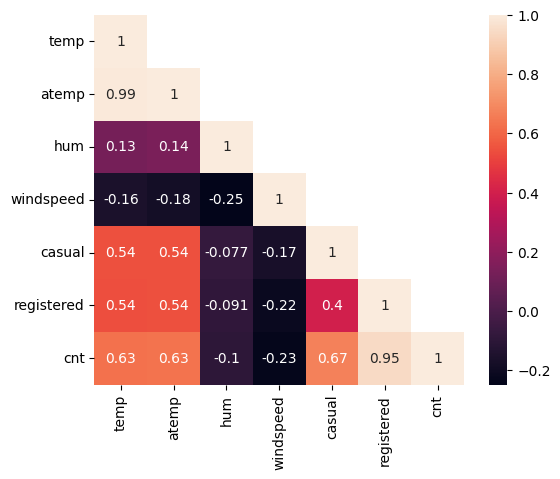

In [27]:
corr=day_data[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
c1= np.array(corr)
c1[np.tril_indices_from(c1)] = False
sns.heatmap(corr, mask=c1,square=True,annot=True)
plt.show()

2. Identify factors that significantly affect the demand for bike rentals and quantify their impact.

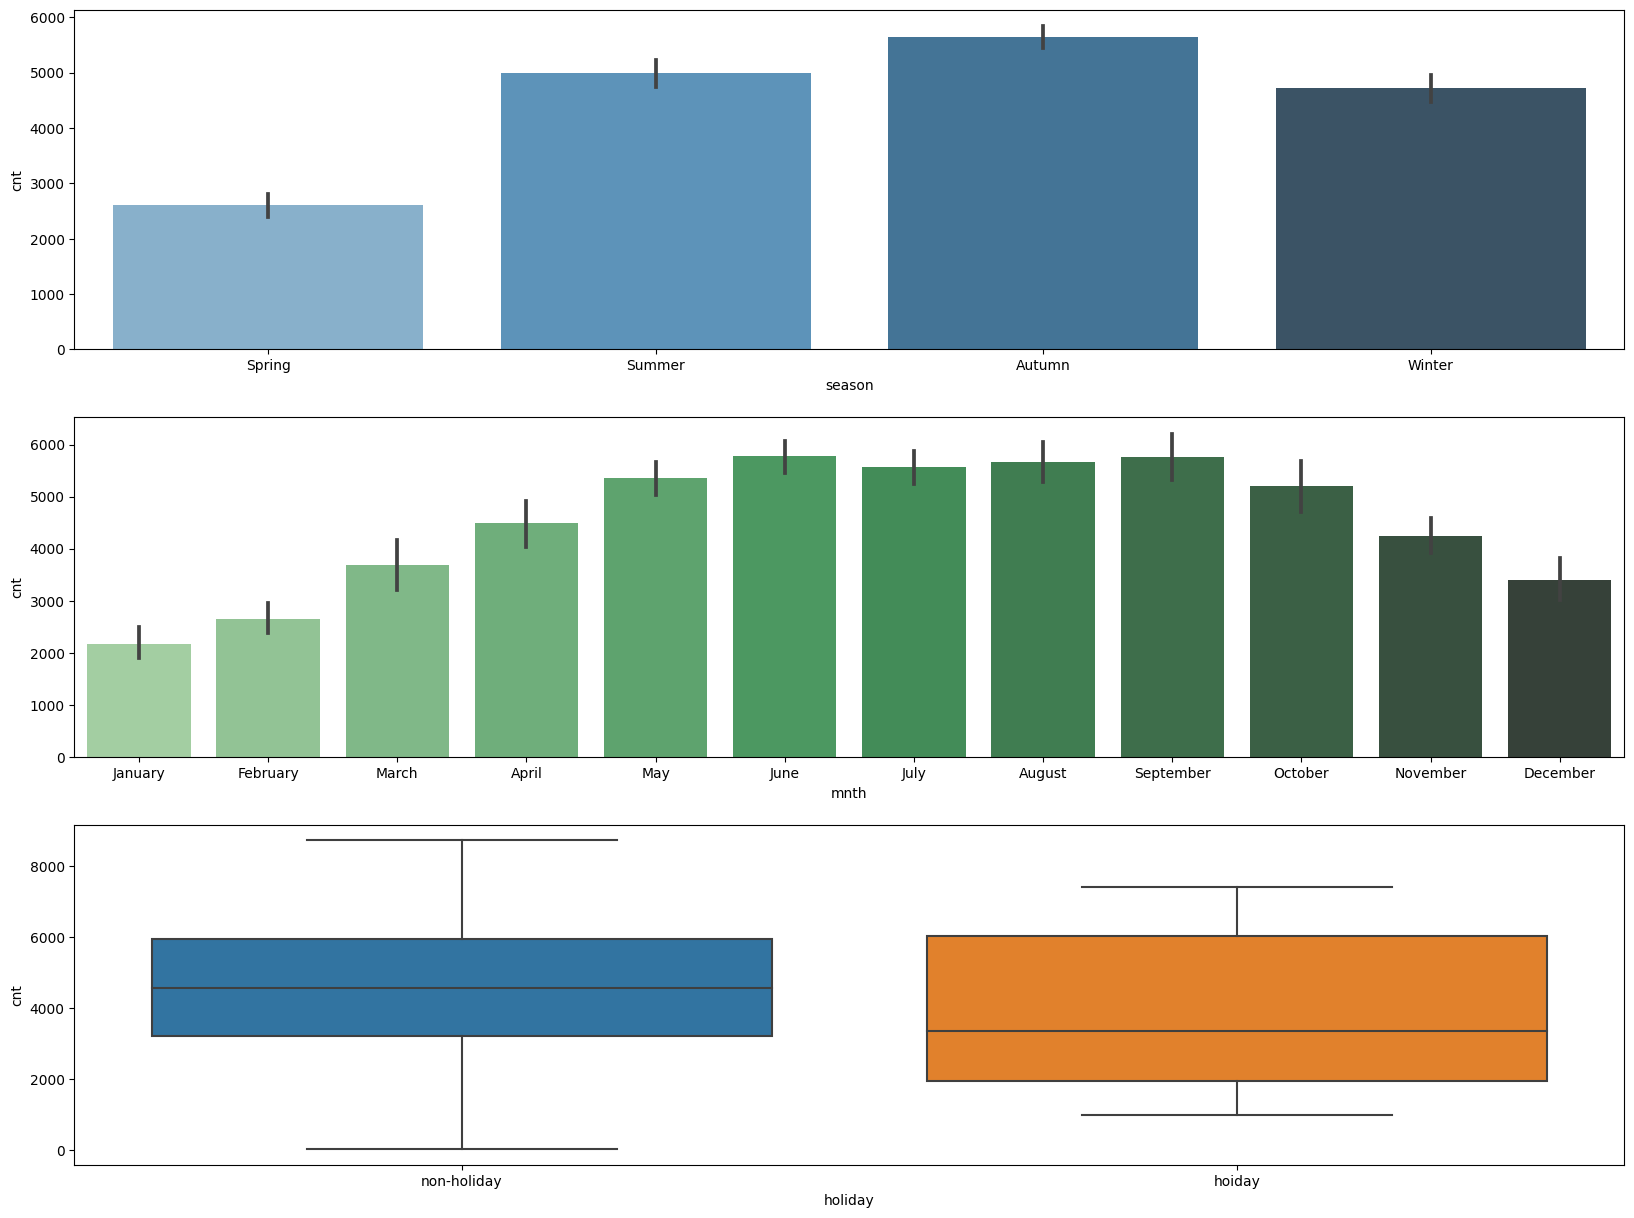

In [28]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='season', y='cnt', palette="Blues_d", data=day_data, ax=ax1)

sns.barplot(x='mnth', y='cnt', palette="Greens_d", data=day_data, ax=ax2)

sns.boxplot(x='holiday', y='cnt', data=day_data, ax=ax3)

plt.show()

4. Analyze the impact of weather conditions, such as temperature, humidity, and wind speed, on bike rental demand

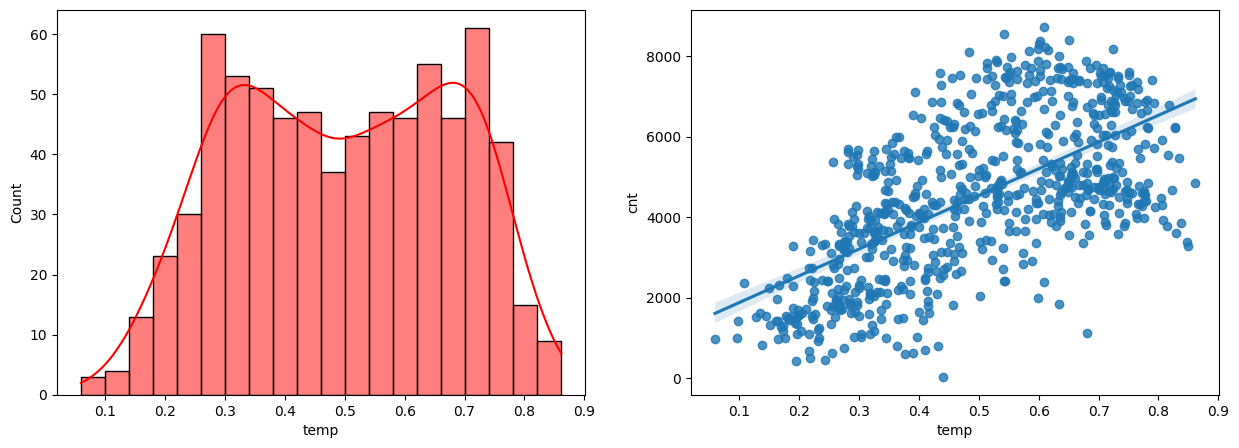

In [29]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Temperature distribution
sns.histplot(day_data['temp'], bins=20, ax=ax1, color='r', kde=True)

# Relationship between temp and cnt
sns.regplot(x='temp', y='cnt', data=day_data, ax=ax2)
plt.show()

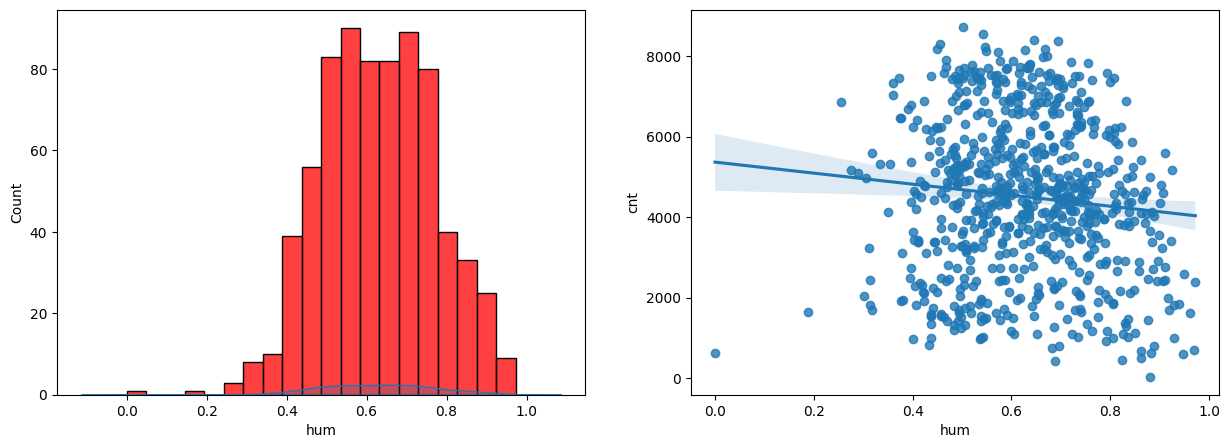

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Humidity distribution
sns.histplot(day_data['hum'], bins=20, ax=ax1, color='r')
sns.kdeplot(day_data['hum'], fill=True, ax=ax1)

# Relationship between humidity and cnt
sns.regplot(x='hum', y='cnt', data=day_data, ax=ax2)

plt.show()

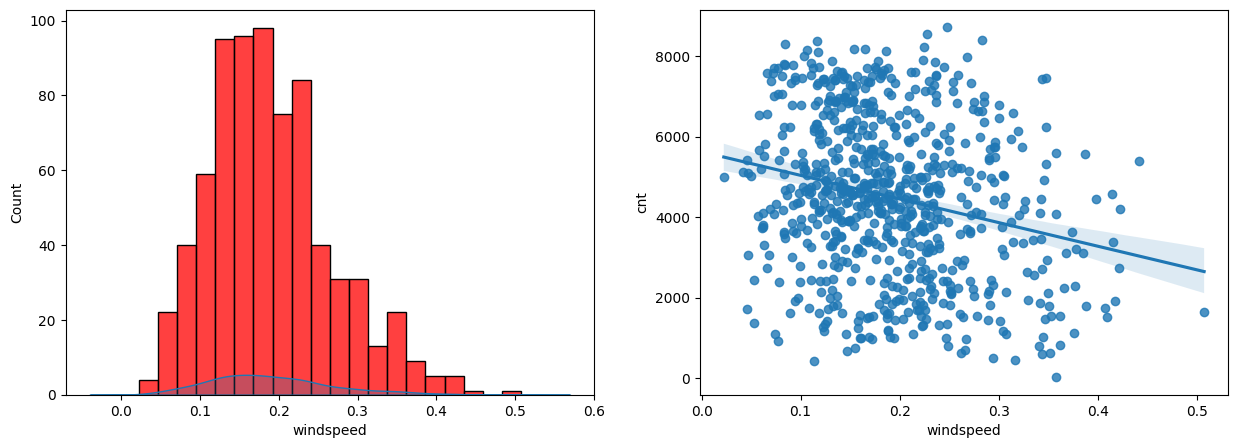

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

# windspeed distribution
sns.histplot(day_data['windspeed'], bins=20, ax=ax1, color='r')
sns.kdeplot(day_data['windspeed'], fill=True, ax=ax1)

# Relationship between windspeed and cnt
sns.regplot(x='windspeed', y='cnt', data=day_data, ax=ax2)

plt.show()

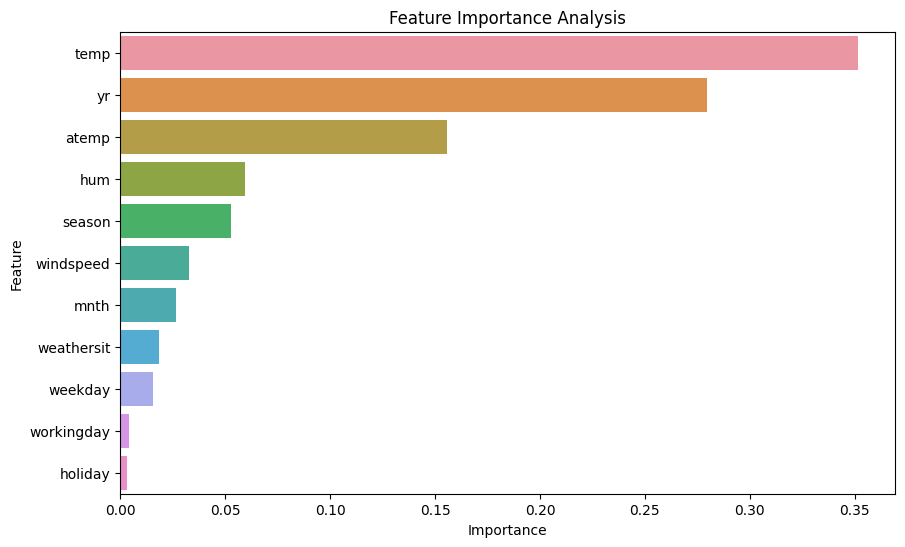

In [14]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['yr', 'season', 'mnth', 'holiday', 'weekday', 'weathersit']
for col in categorical_columns:
    day_data[col] = le.fit_transform(day_data[col])

# Define features (X) and target variable (y)
X = day_data.drop(['cnt', 'casual', 'registered', 'dteday', 'instant'], axis=1)  # Drop 'dteday' and 'instant' here
y = day_data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

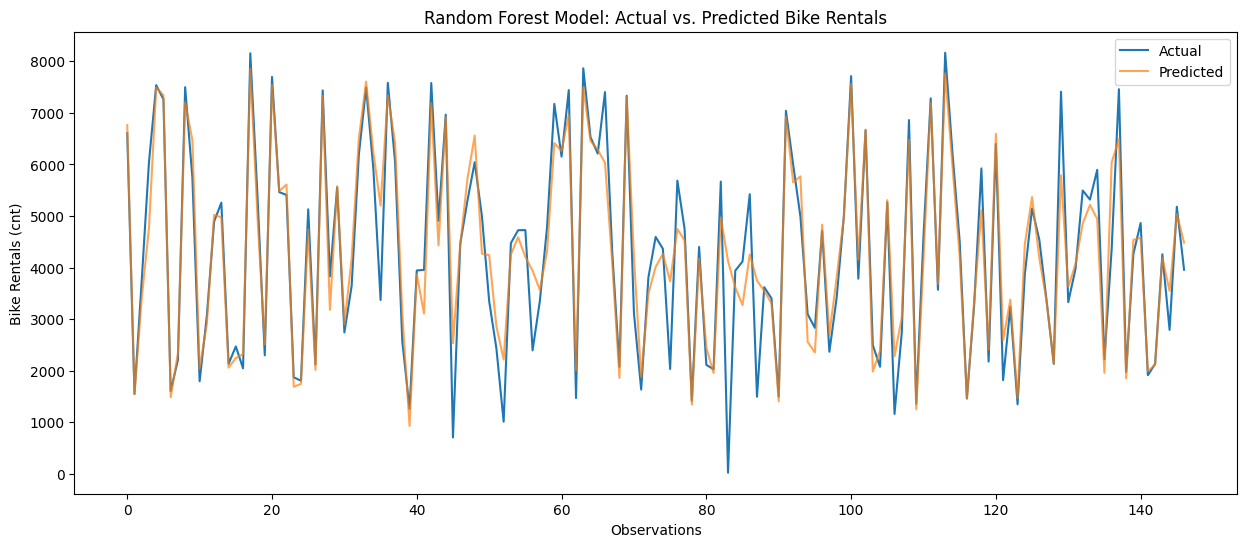

In [46]:
# Visualize actual vs. predicted values for the Random Forest model
y_rf_pred = rf.predict(X_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(y_rf_pred, label='Predicted', alpha=0.7)
plt.xlabel('Observations')
plt.ylabel('Bike Rentals (cnt)')
plt.title('Random Forest Model: Actual vs. Predicted Bike Rentals')
plt.legend()
plt.show()


ADF Statistic: -11.778809074151848
p-value: 1.0467797548021466e-21
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


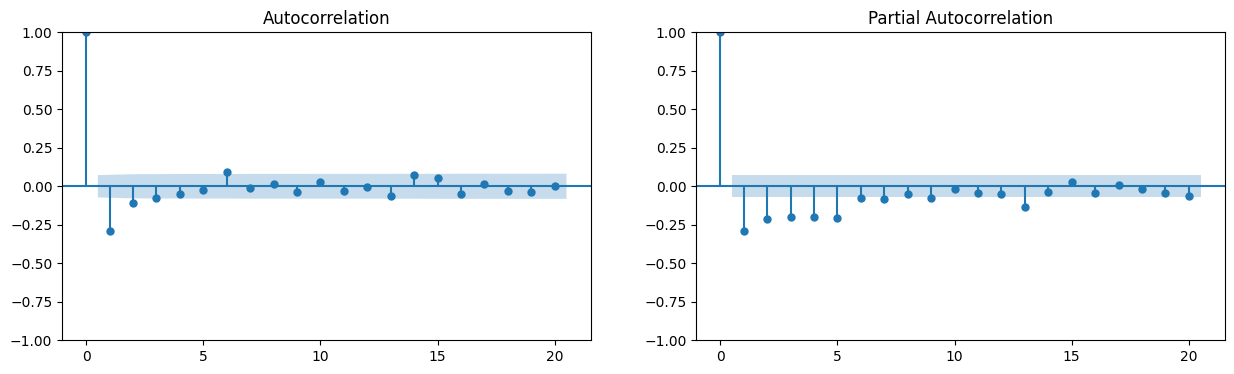

Mean Squared Error: 4373847.321933849


C:\Users\EthanSam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\EthanSam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\EthanSam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [39]:
# Save the original dataset for time series analysis
day_data_original = day_data.copy()

# Rest of the preprocessing and analysis code...

# Time series analysis
# Set the date column as index
day_data_original['dteday'] = pd.to_datetime(day_data_original['dteday'])
day_data_original.set_index('dteday', inplace=True)

# Create a new DataFrame with only the 'cnt' column
ts_data = day_data_original[['cnt']]

# Define the Augmented Dickey-Fuller test function
def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Differencing the data to make it stationary
ts_data_diff = ts_data.diff().dropna()
adf_test(ts_data_diff['cnt'])

# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts_data_diff, lags=20, ax=ax1)
plot_pacf(ts_data_diff, lags=20, ax=ax2, method='ywm')
plt.show()

# Split the data into training and testing sets
train_data = ts_data[:int(0.8 * len(ts_data))]
test_data = ts_data[int(0.8 * len(ts_data)):]

# Fit the ARIMA model with p=1, d=1, and q=1
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(ts_data) - 1, typ='levels')

# Calculate mean squared error
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error:', mse)

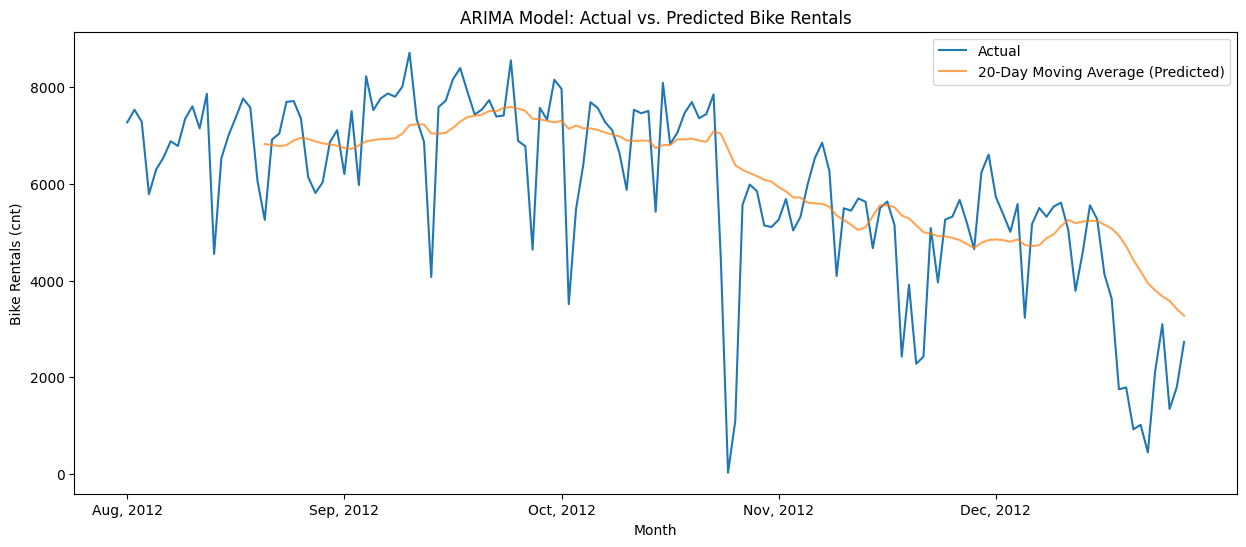

In [47]:
# Add a 20-day moving average to the chart
rolling_mean = test_data.rolling(window=20).mean()

plt.figure(figsize=(15, 6))
plt.plot(test_data.reset_index(drop=True), label='Actual')
plt.plot(rolling_mean.reset_index(drop=True), label='20-Day Moving Average (Predicted)', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Bike Rentals (cnt)')
plt.title('ARIMA Model: Actual vs. Predicted Bike Rentals')
plt.legend()

# Add the month and year to the x-axis
xticks = [i for i in range(len(test_data)) if i % 30 == 0]
xticklabels = [f'{calendar.month_abbr[date.month]}, {date.year}' for date in test_data.index[xticks]]
plt.xticks(xticks, xticklabels)

plt.show()
